# Comparison with EventDisplay

**Purpose of this notebook:**

Compare IRF and Sensitivity as computed by pyirf and EventDisplay on the same DL2 results

**Notes:**

The following results correspond to:

- Paranal site
- Zd 20 deg, Az 180 deg
- 50 h observation time

**Resources:**

_EventDisplay_ DL2 data, https://forge.in2p3.fr/projects/cta_analysis-and-simulations/wiki/Eventdisplay_Prod3b_DL2_Lists


Download and unpack the data using 

```bash
$ curl -fL -o data.zip https://nextcloud.e5.physik.tu-dortmund.de/index.php/s/Cstsf8MWZjnz92L/download
$ unzip data.zip
$ mv eventdisplay_dl2 data
```

## Table of contents

* [Optimized cuts](#Optimized-cuts)
    - [Direction cut](#Direction-cut)
* [Differential sensitivity from cuts optimization](#Differential-sensitivity-from-cuts-optimization)
* [IRFs](#IRFs)
    - [Effective area](#Effective-area)
    - [Point Spread Function](#Point-Spread-Function)
        + [Angular resolution](#Angular-resolution)
    - [Energy dispersion](#Energy-dispersion)
        + [Energy resolution](#Energy-resolution)
    - [Background rate](#Background-rate)

## Imports

In [1]:
import os

import numpy as np
import uproot
from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.table import QTable
from matplotlib.ticker import ScalarFormatter

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (9, 6)

## Input data

### _EventDisplay_

The input data provided by _EventDisplay_ is stored in _ROOT_ format, so _uproot_ is used to transform it into _numpy_ objects. 

In [3]:
# Path of EventDisplay IRF data in the user's local setup
# Please, empty the indir_EventDisplay variable before pushing to the repo
indir = "../../data/"
irf_file_event_display = "DESY.d20180113.V3.ID0_180degNIM2LST4MST4SST4SCMST4.prod3b-paranal20degs05b-NN.S.3HB9-FD.180000s.root"

irf_eventdisplay = uproot.open(os.path.join(indir, irf_file_event_display))

## _pyirf_

The following is the current IRF + sensititivy output FITS format provided by this software.

Run `python examples/calculate_eventdisplay_irfs.py` after downloading the data

In [4]:
pyirf_file = '../../pyirf_eventdisplay.fits.gz'

## Optimized cuts
[back to top](#Table-of-contents)

### Direction cut
[back to top](#Table-of-contents)

In [5]:
from astropy.table import QTable


rad_max = QTable.read(pyirf_file, hdu='RAD_MAX')[0]


theta_cut_ed = irf_eventdisplay['ThetaCut;1']
plt.errorbar(
    10**theta_cut_ed.edges[:-1],
    theta_cut_ed.values**2,
    xerr=np.diff(10**theta_cut_ed.edges),
    ls='',
    label='EventDisplay',
)

plt.errorbar(
    0.5 * (rad_max['ENERG_LO'] + rad_max['ENERG_HI'])[1:-1].to_value(u.TeV),
    rad_max['RAD_MAX'].T[1:-1, 0].to_value(u.deg)**2,
    xerr=0.5 * (rad_max['ENERG_HI'] - rad_max['ENERG_LO'])[1:-1].to_value(u.TeV),
    ls='',
    label='pyirf',
)

plt.legend()
plt.ylabel('θ²-cut / deg²')
plt.xlabel(r'$E_\mathrm{reco} / \mathrm{TeV}$')
plt.xscale('log')
plt.yscale('log')

None # to remove clutter by mpl objects

KeyError: "Extension 'RAD_MAX' not found."

In [6]:
from astropy.table import QTable


gh_cut = QTable.read(pyirf_file, hdu='GH_CUTS')[1:-1]


plt.errorbar(
    0.5 * (gh_cut['low'] + gh_cut['high']).to_value(u.TeV),
    gh_cut['cut'],
    xerr=0.5 * (gh_cut['high'] - gh_cut['low']).to_value(u.TeV),
    ls='',
    label='pyirf',
)

plt.legend()
plt.ylabel('G/H-cut')
plt.xlabel(r'$E_\mathrm{reco} / \mathrm{TeV}$')
plt.xscale('log')

None # to remove clutter by mpl objects

KeyError: "Extension 'GH_CUTS' not found."

## Differential sensitivity from cuts optimization
[back to top](#Table-of-contents)

In [8]:
# [1:-1] removes under/overflow bin
sensitivity = QTable.read(pyirf_file, hdu='SENSITIVITY_mean')[1:-1]
sensitivity

reco_energy_low,reco_energy_high,reco_energy_center,n_signal,n_signal_weighted,n_background,n_background_weighted,relative_sensitivity,flux_sensitivity
TeV,TeV,TeV,,,,,,1 / (cm2 s TeV)
float64,float64,float64,int64,float64,float64,float64,float64,float64
0.012589254117941675,0.0199526231496888,0.016270938633815235,25,11882.271987142245,nan,nan,nan,nan
0.0199526231496888,0.03162277660168379,0.025787699875686295,23,6122.410639437541,67.74050376511455,12179.500263552227,0.045103991015913406,1.853960072781395e-08
0.03162277660168379,0.05011872336272722,0.04087074998220551,21,3409.051088357257,99.0173263188466,18442.547927687465,0.09928548261074772,1.2211560235380246e-08
0.05011872336272722,0.07943282347242814,0.06477577341757768,83,8689.607748602823,136.05215136975366,14757.845612277744,0.03491383642250656,1.284940381155061e-09
0.07943282347242814,0.12589254117941667,0.1026626823259224,87755,21813201.82219695,468947.54228996235,116945403.28430499,nan,nan
0.12589254117941667,0.1995262314968879,0.1627093863381523,163,5110.478893175721,622.164872154149,20366.056517165624,0.06954082443042305,2.291528378362311e-10
0.1995262314968879,0.3162277660168378,0.2578769987568628,71,1473.2786191552877,949.4091668149571,20117.353807483076,0.2397685661308799,2.364164277985968e-10
0.3162277660168378,0.501187233627272,0.4087074998220549,255,3288.1478823050857,911.2081452342863,11943.134823590864,0.08318027848778713,2.4541763965528127e-11


<Figure size 864x576 with 0 Axes>

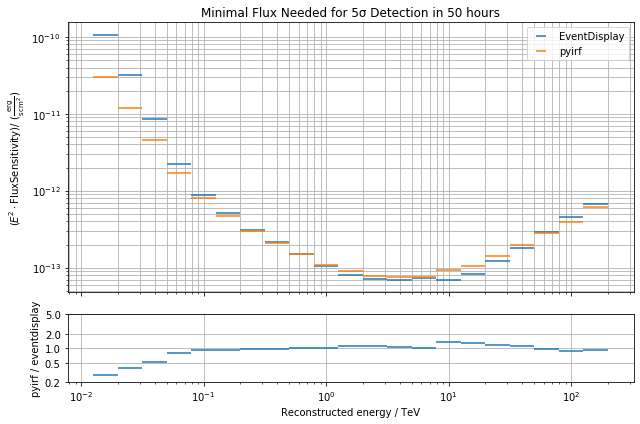

In [9]:
plt.figure(figsize=(12,8))

# Get data from event display file
h = irf_eventdisplay["DiffSens"]
bins = 10**h.edges
x = 0.5 * (bins[:-1] + bins[1:])
width = np.diff(bins)
y = h.values


fig, (ax_sens, ax_ratio) = plt.subplots(
    2, 1,
    gridspec_kw={'height_ratios': [4, 1]},
    sharex=True,
)

ax_sens.errorbar(
    x,
    y, 
    xerr=width/2,
    yerr=None,
    label="EventDisplay",
    ls=''
)

unit = u.Unit('erg cm-2 s-1')


e = sensitivity['reco_energy_center']
s = (e**2 * sensitivity['flux_sensitivity'])
w = (sensitivity['reco_energy_high'] - sensitivity['reco_energy_low'])

ax_sens.errorbar(
    e.to_value(u.TeV),
    s.to_value(unit),
    xerr=w.to_value(u.TeV) / 2,
    ls='',
    label='pyirf'
)

ax_ratio.errorbar(
    e.to_value(u.TeV), s.to_value(unit) / y,
    xerr=w.to_value(u.TeV)/2,
    ls=''
)
ax_ratio.set_yscale('log')
ax_ratio.set_xlabel("Reconstructed energy / TeV")
ax_ratio.set_ylabel('pyirf / eventdisplay')
ax_ratio.grid()
ax_ratio.yaxis.set_major_formatter(ScalarFormatter())

ax_ratio.set_ylim(0.2, 5.0)
ax_ratio.set_yticks([0.2, 0.5, 1, 2, 5])
ax_ratio.set_yticks([], minor=True)

# Style settings
ax_sens.set_title('Minimal Flux Needed for 5σ Detection in 50 hours')
ax_sens.set_xscale("log")
ax_sens.set_yscale("log")
ax_sens.set_ylabel(rf"$(E^2 \cdot \mathrm{{Flux Sensitivity}}) /$ ({unit.to_string('latex')})")

ax_sens.grid(which="both")
ax_sens.legend()
fig.tight_layout(h_pad=0)

None # to remove clutter by mpl objects

## IRFs
[back to top](#Table-of-contents)

### Effective area
[back to top](#Table-of-contents)

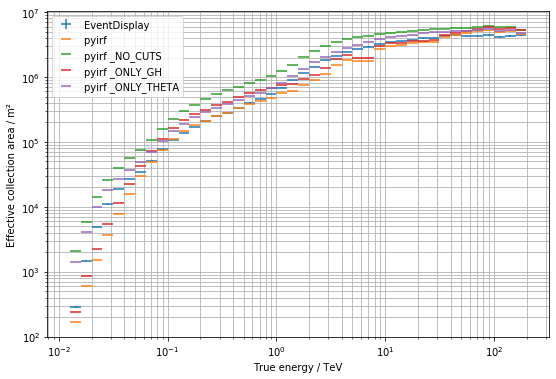

In [9]:

# Data from EventDisplay
h = irf_eventdisplay["EffectiveAreaEtrue"]

x = 0.5 * (10**h.edges[:-1] + 10**h.edges[1:])
xerr = 0.5 * np.diff(10**h.edges)
y = h.values
yerr = np.sqrt(h.variances)

plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls='', label="EventDisplay")

for name in ('', '_NO_CUTS', '_ONLY_GH', '_ONLY_THETA'):

    area = QTable.read(pyirf_file, hdu='EFFECTIVE_AREA' + name)[0]

    
    plt.errorbar(
        0.5 * (area['ENERG_LO'] + area['ENERG_HI']).to_value(u.TeV)[1:-1],
        area['EFFAREA'].to_value(u.m**2).T[1:-1, 0],
        xerr=0.5 * (area['ENERG_LO'] - area['ENERG_HI']).to_value(u.TeV)[1:-1],
        ls='',
        label='pyirf ' + name,
    )

# Style settings
plt.xscale("log")
plt.yscale("log")
plt.xlabel("True energy / TeV")
plt.ylabel("Effective collection area / m²")
plt.grid(which="both")
plt.legend()

None # to remove clutter by mpl objects

### Point Spread Function
[back to top](#Table-of-contents)

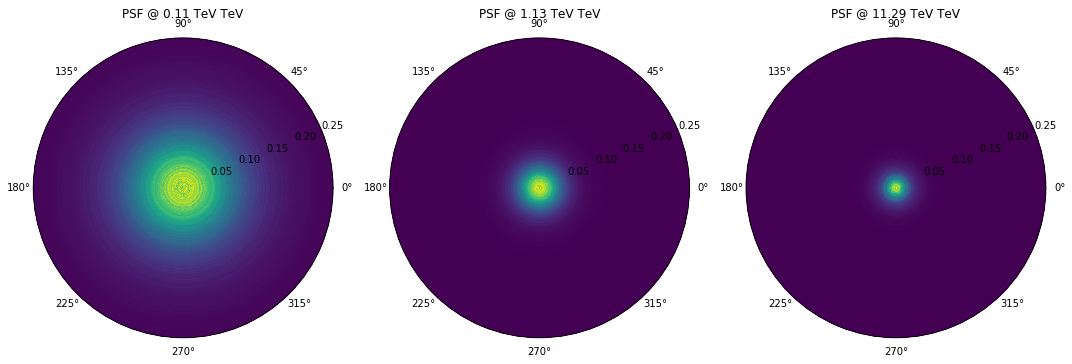

In [11]:
psf_table = QTable.read(pyirf_file, hdu='PSF')[0]
# select the only fov offset bin
psf = psf_table['RPSF'].T[:, 0, :].to_value(1 / u.sr)

offset_bins = np.append(psf_table['RAD_LO'], psf_table['RAD_HI'][-1])
phi_bins = np.linspace(0, 2 * np.pi, 100)



# Let's make a nice 2d representation of the radially symmetric PSF
r, phi = np.meshgrid(offset_bins.to_value(u.deg), phi_bins)

# look at a single energy bin
# repeat values for each phi bin
center = 0.5 * (psf_table['ENERG_LO'] + psf_table['ENERG_HI'])


fig = plt.figure(figsize=(15, 5))
axs = [fig.add_subplot(1, 3, i, projection='polar') for i in range(1, 4)]


for bin_id, ax in zip([10, 20, 30], axs):
    image = np.tile(psf[bin_id], (len(phi_bins) - 1, 1))
    
    ax.set_title(f'PSF @ {center[bin_id]:.2f} TeV')
    ax.pcolormesh(phi, r, image)
    ax.set_ylim(0, 0.25)
    ax.set_aspect(1)
    
fig.tight_layout()

None # to remove clutter by mpl objects

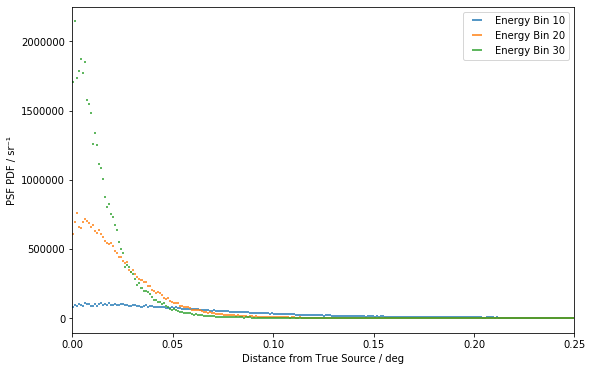

In [12]:
# Profile
center = 0.5 * (offset_bins[1:] + offset_bins[:-1])
xerr = 0.5 * (offset_bins[1:] - offset_bins[:-1])

for bin_id in [10, 20, 30]:
    plt.errorbar(
        center.to_value(u.deg),
        psf[bin_id],
        xerr=xerr.to_value(u.deg),
        ls='',
        label=f'Energy Bin {bin_id}'
    )
    
#plt.yscale('log')
plt.legend()
plt.xlim(0, 0.25)
plt.ylabel('PSF PDF / sr⁻¹')
plt.xlabel('Distance from True Source / deg')

None # to remove clutter by mpl objects

#### Angular resolution
[back to top](#Table-of-contents)

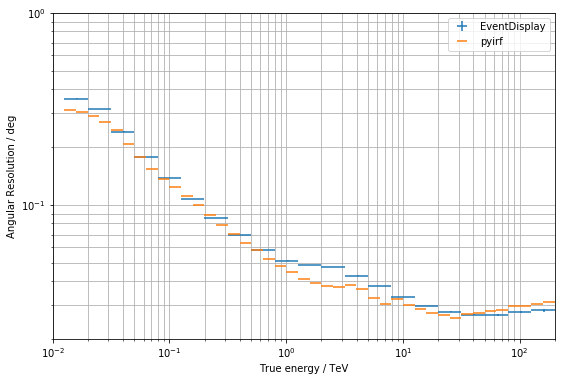

In [13]:
# Data from EventDisplay
h = irf_eventdisplay["AngRes"]
x = 0.5 * (10**h.edges[:-1] + 10**h.edges[1:])
xerr = 0.5 * np.diff(10**h.edges)
y = h.values
yerr = np.sqrt(h.variances)
plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls='', label="EventDisplay")

# pyirf

ang_res = QTable.read(pyirf_file, hdu='ANGULAR_RESOLUTION')[1:-1]

plt.errorbar(
    0.5 * (ang_res['true_energy_low'] + ang_res['true_energy_high']).to_value(u.TeV),
    ang_res['angular_resolution'].to_value(u.deg),
    xerr=0.5 * (ang_res['true_energy_high'] - ang_res['true_energy_low']).to_value(u.TeV),
    ls='',
    label='pyirf'
)


# Style settings
plt.xlim(1.e-2, 2.e2)
plt.ylim(2.e-2, 1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("True energy / TeV")
plt.ylabel("Angular Resolution / deg")
plt.grid(which="both")
plt.legend(loc="best")

None # to remove clutter by mpl objects

### Energy dispersion
[back to top](#Table-of-contents)

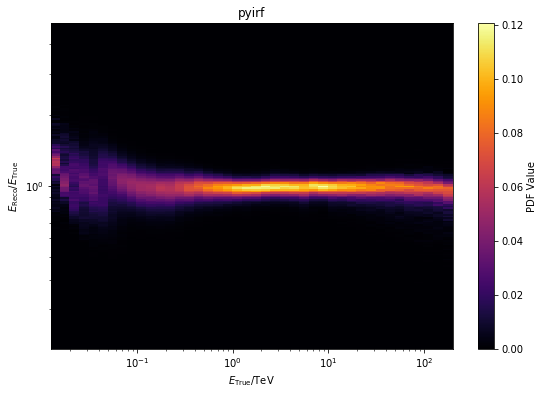

In [14]:
edisp = QTable.read(pyirf_file, hdu='ENERGY_DISPERSION')[0]

e_bins = edisp['ENERG_LO'][1:]
migra_bins = edisp['MIGRA_LO'][1:]

plt.title('pyirf')
plt.pcolormesh(e_bins.to_value(u.TeV), migra_bins, edisp['MATRIX'].T[1:-1, 1:-1, 0].T, cmap='inferno')

plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='PDF Value')

plt.xlabel(r'$E_\mathrm{True} / \mathrm{TeV}$')
plt.ylabel(r'$E_\mathrm{Reco} / E_\mathrm{True}$')

None # to remove clutter by mpl objects

#### Energy resolution
[back to top](#Table-of-contents)

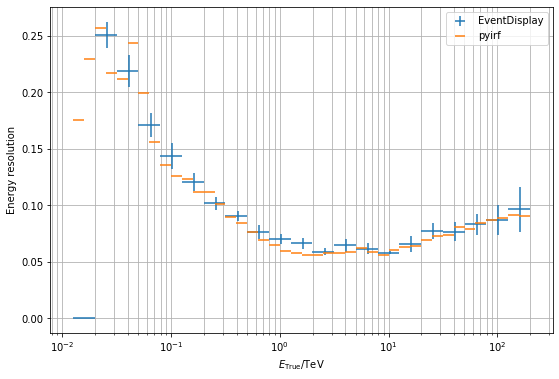

In [15]:
# Data from EventDisplay
h = irf_eventdisplay["ERes"]
x = 0.5 * (10**h.edges[:-1] + 10**h.edges[1:])
xerr = np.diff(10**h.edges) / 2
y = h.values
yerr = np.sqrt(h.variances)

# Data from pyirf
bias_resolution = QTable.read(pyirf_file, hdu='ENERGY_BIAS_RESOLUTION')[1:-1]

# Plot function
plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls='', label="EventDisplay")
plt.errorbar(
    0.5 * (bias_resolution['true_energy_low'] + bias_resolution['true_energy_high']).to_value(u.TeV),
    bias_resolution['resolution'],
    xerr=0.5 * (bias_resolution['true_energy_high'] - bias_resolution['true_energy_low']).to_value(u.TeV),
    ls='',
    label='pyirf'
)
plt.xscale('log')

# Style settings
plt.xlabel(r"$E_\mathrm{True} / \mathrm{TeV}$")
plt.ylabel("Energy resolution")
plt.grid(which="both")
plt.legend(loc="best")

None # to remove clutter by mpl objects

### Background rate
[back to top](#Table-of-contents)

/cta/verna/anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


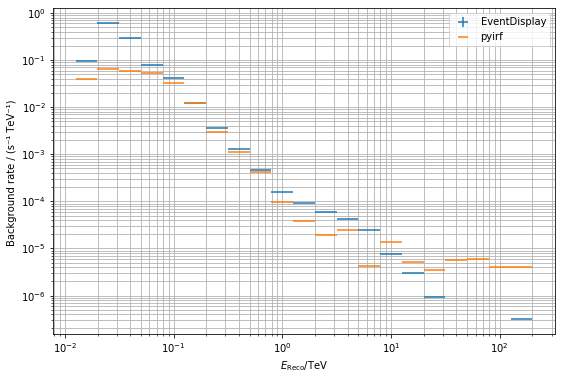

In [16]:
from pyirf.utils import cone_solid_angle

# Data from EventDisplay
h = irf_eventdisplay["BGRate"]
x = 0.5 * (10**h.edges[:-1] + 10**h.edges[1:])
width = np.diff(10**h.edges)
xerr = width / 2
y = h.values
yerr = np.sqrt(h.variances)

# pyirf data

bg_rate = QTable.read(pyirf_file, hdu='BACKGROUND')[0]

reco_bins = np.append(bg_rate['ENERG_LO'], bg_rate['ENERG_HI'][-1])

# first fov bin, [0, 1] deg
fov_bin = 0
rate_bin = bg_rate['BKG'].T[:, fov_bin]


# interpolate theta cut for given e reco bin
e_center_bg = 0.5 * (bg_rate['ENERG_LO'] + bg_rate['ENERG_HI'])
e_center_theta = 0.5 * (rad_max['ENERG_LO'] + rad_max['ENERG_HI'])
theta_cut = np.interp(e_center_bg, e_center_theta, rad_max['RAD_MAX'].T[:, 0])

# undo normalization
rate_bin *= cone_solid_angle(theta_cut)
rate_bin *= np.diff(reco_bins)


# Plot function
plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls='', label="EventDisplay")

plt.errorbar(
    0.5 * (bg_rate['ENERG_LO'] + bg_rate['ENERG_HI']).to_value(u.TeV)[1:-1],
    rate_bin.to_value(1 / u.s)[1:-1],
    xerr=np.diff(reco_bins).to_value(u.TeV)[1:-1] / 2,
    ls='',
    label='pyirf',
)

# Style settings
plt.xscale("log")
plt.xlabel(r"$E_\mathrm{Reco} / \mathrm{TeV}$")
plt.ylabel("Background rate / (s⁻¹ TeV⁻¹) ")
plt.grid(which="both")
plt.legend(loc="best")
plt.yscale('log')

None # to remove clutter by mpl objects